<a href="https://colab.research.google.com/github/ReginaDivaDharma/raisin-analysis-SVM/blob/main/Raisin_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SVM libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report

# Install to use read_excel
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Read data set
data = pd.read_excel('Raisin_Dataset.xlsx', sheet_name = 'Raisin_Dataset')
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [ ]:
# Data frame structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
# Convert columns to numeric
data['Class'] = data['Class'].str.replace('Kecimen', '0')
data['Class'] = data['Class'].str.replace('Besni', '1')

cols = data.columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

# Data frame structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [ ]:
# Classes are distrubuted evenly
data['Class'].value_counts()

0    450
1    450
Name: Class, dtype: int64

In [ ]:
# Data for SVM
X = data
X = X.drop(['Class'], axis = 1)
Y = data.Class # class


In [ ]:
# Parameters for classificator - rbf kernel
gamma = [0.0005, 0.005, 0.01, 0.05, 0.2, 0.8, 1.5, 2.5, 5, 10, 20, 50, 100]
gamma = np.array(gamma)
C = [1, 10, 100, 1000, 10000, 100000]
C = np.array(C)

In [ ]:
# Tables to save accuracy - rbf kernel
Accuracy_CV = np.zeros((10,1))
Accuracy = np.zeros((len(gamma), len(C)))

# SVM - rbf kernel
for i in range(0, len(C)): # C
    for j in range(0, len(gamma)): # gamma
        for k in range(1, 10): # Crossvalidation
            # Split data into test and train sets
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10) # 10 times cs so test_size is 10% of data set

            # Standarization
            sc = StandardScaler()
            sc.fit(X_train)
            X_train = sc.transform(X_train)
            X_test = sc.transform(X_test)
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

            # Model
            svclassifier = SVC(kernel = 'rbf', C = C[i], gamma = gamma[j])

            svclassifier.fit(X_train, Y_train)
            y_pred = svclassifier.predict(X_test)

            # Accuracy - how many values from y_pred are equal to Y_test
            Accuracy_CV[k] = sum(y_pred == Y_test)/len(Y_test)

        Accuracy[j,i] = np.mean(Accuracy_CV) # rows - gamma, columns - C

Accuracy # display accuracy table

array([[0.76444444, 0.78      , 0.78777778, 0.78888889, 0.79333333,
        0.79111111],
       [0.80222222, 0.77444444, 0.77222222, 0.76111111, 0.79222222,
        0.76666667],
       [0.77777778, 0.78222222, 0.78      , 0.79444444, 0.78777778,
        0.78444444],
       [0.78444444, 0.76777778, 0.79333333, 0.80888889, 0.76      ,
        0.77444444],
       [0.77666667, 0.77222222, 0.75888889, 0.77      , 0.75666667,
        0.75      ],
       [0.78777778, 0.78777778, 0.76444444, 0.73222222, 0.71555556,
        0.70777778],
       [0.77666667, 0.77777778, 0.73888889, 0.74444444, 0.73888889,
        0.72555556],
       [0.77222222, 0.75111111, 0.72111111, 0.72555556, 0.71888889,
        0.70666667],
       [0.75555556, 0.72555556, 0.73777778, 0.70222222, 0.70888889,
        0.72111111],
       [0.73888889, 0.72555556, 0.74333333, 0.70222222, 0.70888889,
        0.72      ],
       [0.67666667, 0.68888889, 0.67777778, 0.68777778, 0.69444444,
        0.68777778],
       [0.62888889, 0

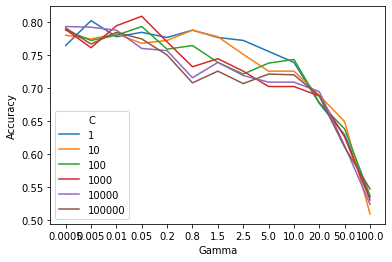

In [ ]:
# rbf kernel accuracy plot
# axis X - gamma, different lines - C
for p in range(0, len(C)): # number of lines = number of C values
    plt.plot(Accuracy[:,p], label = C[p]) # every line plotted separately in order to have a name
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(gamma)), gamma) # correct axis X ticks
plt.legend(title = 'C')



In [ ]:
C = [1, 10, 100, 1000, 10000, 100000]
C = np.array(C)

k_range = 10
Accuracy_CV2 = np.zeros((len(C),2))
Accuracy_rbf2 = np.zeros((k_range,2))
# SVM - rbf kernel - k is outside loop
for k in range(0, k_range):
    # Split data into test and train sets
    X_train_rbf2, X_test_rbf2, Y_train_rbf2, Y_test_rbf2 = train_test_split(X, Y, test_size = k_range/100) # 10 times cs so test_size is 10% of data set

    # Standarization
    sc = StandardScaler()
    sc.fit(X_train_rbf2)
    X_train_rbf2 = sc.transform(X_train_rbf2)
    X_test_rbf2 = sc.transform(X_test_rbf2)
    X_train_rbf2 = pd.DataFrame(X_train_rbf2)
    X_test_rbf2 = pd.DataFrame(X_test_rbf2)

    for i in range(0, len(C)):
        # Model
        svclassifier = SVC(kernel = 'rbf', C = C[i], gamma = 0.05) # gamma constant
        svclassifier.fit(X_train_rbf2, Y_train_rbf2)
        y_pred_rbf2 = svclassifier.predict(X_test_rbf2)

        # Accuracy
        Accuracy_CV2[i,0] = sum(y_pred_rbf2 == Y_test_rbf2)/len(Y_test_rbf2)
        Accuracy_CV2[i,1] = C[i]

    Accuracy_rbf2[k,0] = np.max(Accuracy_CV2[:,0]) # best accuracy
    id_max = np.argmax(Accuracy_CV2[:,0], axis=0)
    Accuracy_rbf2[k,1] = Accuracy_CV2[id_max,1] # C for best acuracy

print("Accuracy table:\n", Accuracy_rbf2) # display accuracy table

Accuracy table:
 [[9.11111111e-01 1.00000000e+02]
 [8.88888889e-01 1.00000000e+03]
 [8.11111111e-01 1.00000000e+00]
 [8.88888889e-01 1.00000000e+00]
 [8.88888889e-01 1.00000000e+00]
 [8.77777778e-01 1.00000000e+00]
 [9.00000000e-01 1.00000000e+01]
 [9.00000000e-01 1.00000000e+01]
 [8.88888889e-01 1.00000000e+05]
 [8.77777778e-01 1.00000000e+00]]


In [ ]:
# Average accuracy
Accuracy_mean = np.mean(Accuracy_rbf2[:,0])
print("Mean accuracy =", Accuracy_mean)

Mean accuracy = 0.8833333333333334


In [ ]:
# Accuracy closest to average accuracy
Accuarcy_roznica = Accuracy_rbf2[:,0] - Accuracy_mean
Accuarcy_roznica = abs(Accuarcy_roznica)
id_min = np.argmin(Accuarcy_roznica, axis=0)
avg_acc_C = Accuracy_rbf2[id_min, 1]
avg_acc = Accuracy_rbf2[id_min, 0]
print("C for value closest to average accuracy:",avg_acc_C)

C for value closest to average accuracy: 1000.0


In [ ]:
# Split
X_train_last, X_test_last, Y_train_last, Y_test_last = train_test_split(X, Y, test_size = 0.10)

# Standarization
sc = StandardScaler()
sc.fit(X_train_last)
X_train_last = sc.transform(X_train_last)
X_test_last = sc.transform(X_test_last)
X_train_last = pd.DataFrame(X_train_last)
X_test_last = pd.DataFrame(X_test_last)

# ModelC[i]
svclassifier = SVC(kernel = 'rbf', C = avg_acc_C, gamma = 0.05)

svclassifier.fit(X_train_last, Y_train_last)
y_pred_last = svclassifier.predict(X_test_last)

# Accuracy - how many values from y_pred are equal to Y_test
Accuracy_CV_last = sum(y_pred_last == Y_test_last)/len(Y_test_last)
print("Accuracy:", Accuracy_CV_last)

Accuracy: 0.8333333333333334


In [ ]:
print(classification_report(Y_test_last, y_pred_last, target_names=['Besni', 'Kecimen']))

              precision    recall  f1-score   support

       Besni       0.73      1.00      0.84        40
     Kecimen       1.00      0.70      0.82        50

    accuracy                           0.83        90
   macro avg       0.86      0.85      0.83        90
weighted avg       0.88      0.83      0.83        90

